### Compare all distances for position representation

In [ ]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [ ]:
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/cc_pc_distance/'

figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/trial_aligned_events/distance_mean_representations/distance_statistics/'

In [ ]:
mouse_vector = [56165, 56166, 32363, 32364, 32365, 32366, 411857]
conditions_vector = ['RANDOM', 'OVERLAPPING','STABLE']
sessions_random = [4,1,1,0,2,3,2]
sessions_overlapping = [1,2,2,1,3,0,3]
sessions_stable = [2,0,0,2,0,0,1]

In [7]:
random_list_neural = []
overlapping_list_neural = []
stable_list_neural = []

random_list_pca = []
overlapping_list_pca = []
stable_list_pca = []

random_list_cca = []
overlapping_list_cca = []
stable_list_cca = []

random_list_lda = []
overlapping_list_lda = []
stable_list_lda = []

for day in range(4):
    for i in range(len(mouse_vector)):
        mouse = mouse_vector[i]
        #### check session_random
        session = sessions_random[i]
        if session:
            file_name = input_directory + 'neural_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_neural.append(distance)
            
            file_name = input_directory + 'pca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_pca.append(distance)
                
            file_name = input_directory + 'cca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_cca.append(distance)
            
            file_name = input_directory + 'lda_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_lda.append(distance)
                
        session = sessions_overlapping[i]
        if session:
            file_name = input_directory + 'neural_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_neural.append(distance)
            
            file_name = input_directory + 'pca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_pca.append(distance)
                
            file_name = input_directory + 'cca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_cca.append(distance)
            
            file_name = input_directory + 'lda_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_lda.append(distance)
                
        session = sessions_stable[i]
        if session:
            file_name = input_directory + 'neural_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_neural.append(distance)
            
            file_name = input_directory + 'pca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_pca.append(distance)
                
            file_name = input_directory + 'cca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_cca.append(distance)
            
            file_name = input_directory + 'lda_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_lda.append(distance)


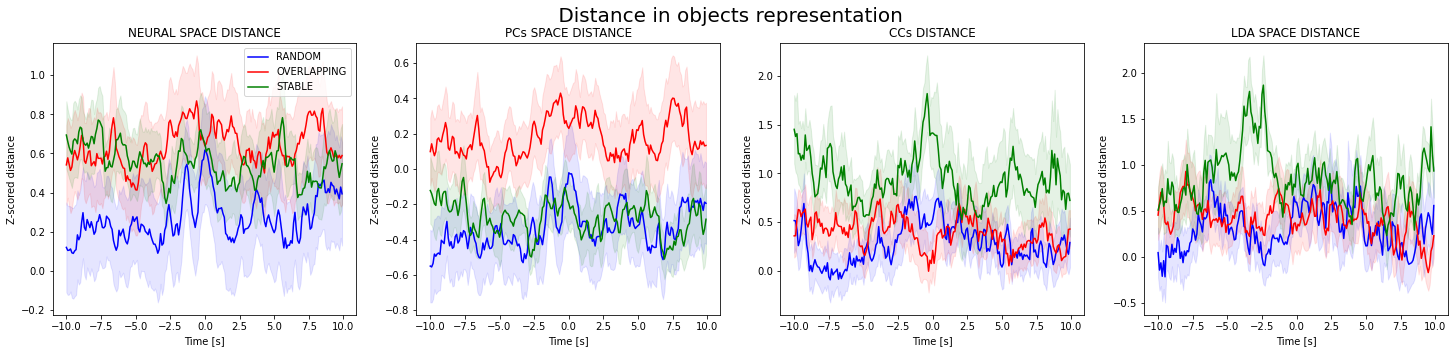

In [8]:
figure = plt.figure()
gs = plt.GridSpec(1,4)
label = ['RANDOM','OVERLAPPING','STABLE']

time = np.arange(-100,100)/10

### neural

ax0 = figure.add_subplot(gs[0,0])
ax0.set_title('NEURAL SPACE DISTANCE')
random_mean = np.mean(random_list_neural,0)
random_std =  np.std(random_list_neural,0)/np.sqrt(len(random_list_neural))
ax0.plot(time,random_mean,'b')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')
ax0.set_ylabel('Z-scored distance')
ax0.set_xlabel('Time [s]')

random_mean = np.mean(overlapping_list_neural,0)
random_std =  np.std(overlapping_list_neural,0)/np.sqrt(len(overlapping_list_neural))
ax0.plot(time,random_mean,'r')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')

random_mean = np.mean(stable_list_neural,0)
random_std =  np.std(stable_list_neural,0)/np.sqrt(len(stable_list_neural))
ax0.plot(time,random_mean,'g')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
ax0.legend(label)


### pca
ax0 = figure.add_subplot(gs[0,1])
ax0.set_title('PCs SPACE DISTANCE')
random_mean = np.mean(random_list_pca,0)
random_std =  np.std(random_list_pca,0)/np.sqrt(len(random_list_neural))
ax0.plot(time,random_mean,'b')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')

random_mean = np.mean(overlapping_list_pca,0)
random_std =  np.std(overlapping_list_pca,0)/np.sqrt(len(overlapping_list_neural))
ax0.plot(time,random_mean,'r')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')


random_mean = np.mean(stable_list_pca,0)
random_std =  np.std(stable_list_pca,0)/np.sqrt(len(stable_list_neural))
ax0.plot(time,random_mean,'g')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
ax0.set_ylabel('Z-scored distance')
ax0.set_xlabel('Time [s]')

####cca

ax0 = figure.add_subplot(gs[0,2])
ax0.set_title('CCs DISTANCE')

random_mean = np.mean(random_list_cca,0)
random_std =  np.std(random_list_cca,0)/np.sqrt(len(random_list_neural))
ax0.plot(time,random_mean,'b')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')


random_mean = np.mean(overlapping_list_cca,0)
random_std =  np.std(overlapping_list_cca,0)/np.sqrt(len(overlapping_list_neural))
ax0.plot(time,random_mean,'r')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')

random_mean = np.mean(stable_list_cca,0)
random_std =  np.std(stable_list_cca,0)/np.sqrt(len(stable_list_neural))
ax0.plot(time,random_mean,'g')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')


ax0.set_ylabel('Z-scored distance')
ax0.set_xlabel('Time [s]')
####lda
ax0 = figure.add_subplot(gs[0,3])
ax0.set_title('LDA SPACE DISTANCE')

random_mean = np.mean(random_list_lda,0)
random_std =  np.std(random_list_lda,0)/np.sqrt(len(random_list_neural))
ax0.plot(time,random_mean,'b')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')

random_mean = np.mean(overlapping_list_lda,0)
random_std =  np.std(overlapping_list_lda,0)/np.sqrt(len(overlapping_list_neural))
ax0.plot(time,random_mean,'r')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')

random_mean = np.mean(stable_list_lda,0)
random_std =  np.std(stable_list_lda,0)/np.sqrt(len(stable_list_neural))
ax0.plot(time,random_mean,'g')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
ax0.set_ylabel('Z-scored distance')
ax0.set_xlabel('Time [s]')
figure.set_size_inches([25,5])


figure.suptitle(' Distance in objects representation', fontsize = 20)
figure_name = figure_path + 'distance_object_representation_all_allocantric.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_name)

[]